In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#add path of getNewestData.py to sys.path
import sys,os
sys.path.append("../../data")

from getNewestData import resample_fix_ends, reassign_outliers

In [22]:
pdf = pd.read_csv("../../data/daily/ewz_stromabgabe_netzebenen_stadt_zuerich.csv",index_col=None)
pdf.index = pd.to_datetime(pdf['Timestamp'],utc=True)
pdf.index = pdf.index.tz_localize(None)  

pdf["y"] = pdf["NE7_GWh"].values
pdf = pdf.drop(columns=["Timestamp","NE5_GWh","NE7_GWh"])

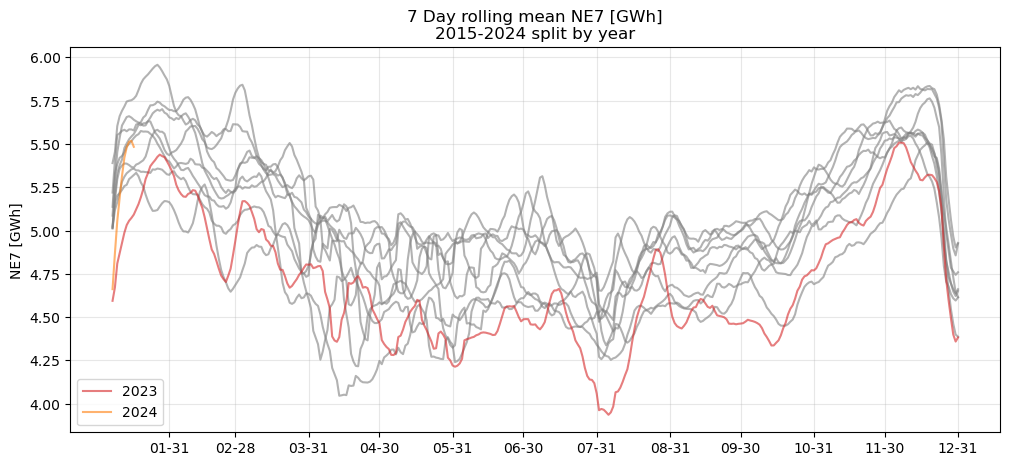

In [23]:
plt.figure(figsize=(12,5))

first_years = pdf.index.year.unique()[:-2]
last_two_years = pdf.index.year.unique()[-2:]

year = pdf.index.to_period("Y")
agg = pdf.groupby([year])
window_average = 7

for name, group in agg:
    
    group = group.rolling(window=window_average, min_periods=window_average).mean()
    group = group[~((group.index.month == 2) & (group.index.day == 29))] #drop leap year day
    date = group.index.strftime('%m-%d')
    year = group.index.year.min()
    
    if year in first_years:
        plt.plot(date, group['y'], alpha=0.6,color='grey')

    # elif year==2022:
    #     plt.plot(date, group['y'],label=str(name),alpha=0.6,color='crimson', linestyle="--")

    elif year== 2023:
        plt.plot(date, group['y'],label=str(name),alpha=0.6,color='tab:red')
    
    else:
        plt.plot(date, group['y'],label=str(name),alpha=0.6,color='tab:orange')

    

endOfMonth = pd.date_range(start="01.01.2018", periods=12, freq="M").strftime('%m-%d')
plt.xticks(ticks=endOfMonth, labels=endOfMonth)
plt.title("7 Day rolling mean NE7 [GWh]\n2015-2024 split by year", )

plt.legend()
plt.ylabel("NE7 [GWh]")
plt.grid(alpha=0.3)
plt.show()